# **Heart Disease prediction**

## **Loading and reading the data**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
work_area=r'C:\Users\curci\Desktop\Data Science Courses\Logistic_regression project\Dataset\framingham.csv'
df=pd.read_csv(work_area)

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.shape

(4238, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

## **Data visualization**

In [7]:
df.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1363
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

In [8]:
discrete_col=df[['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke','prevalentHyp','diabetes','TenYearCHD']]
continuous_col=df.drop(columns=['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke','prevalentHyp','diabetes','TenYearCHD'])

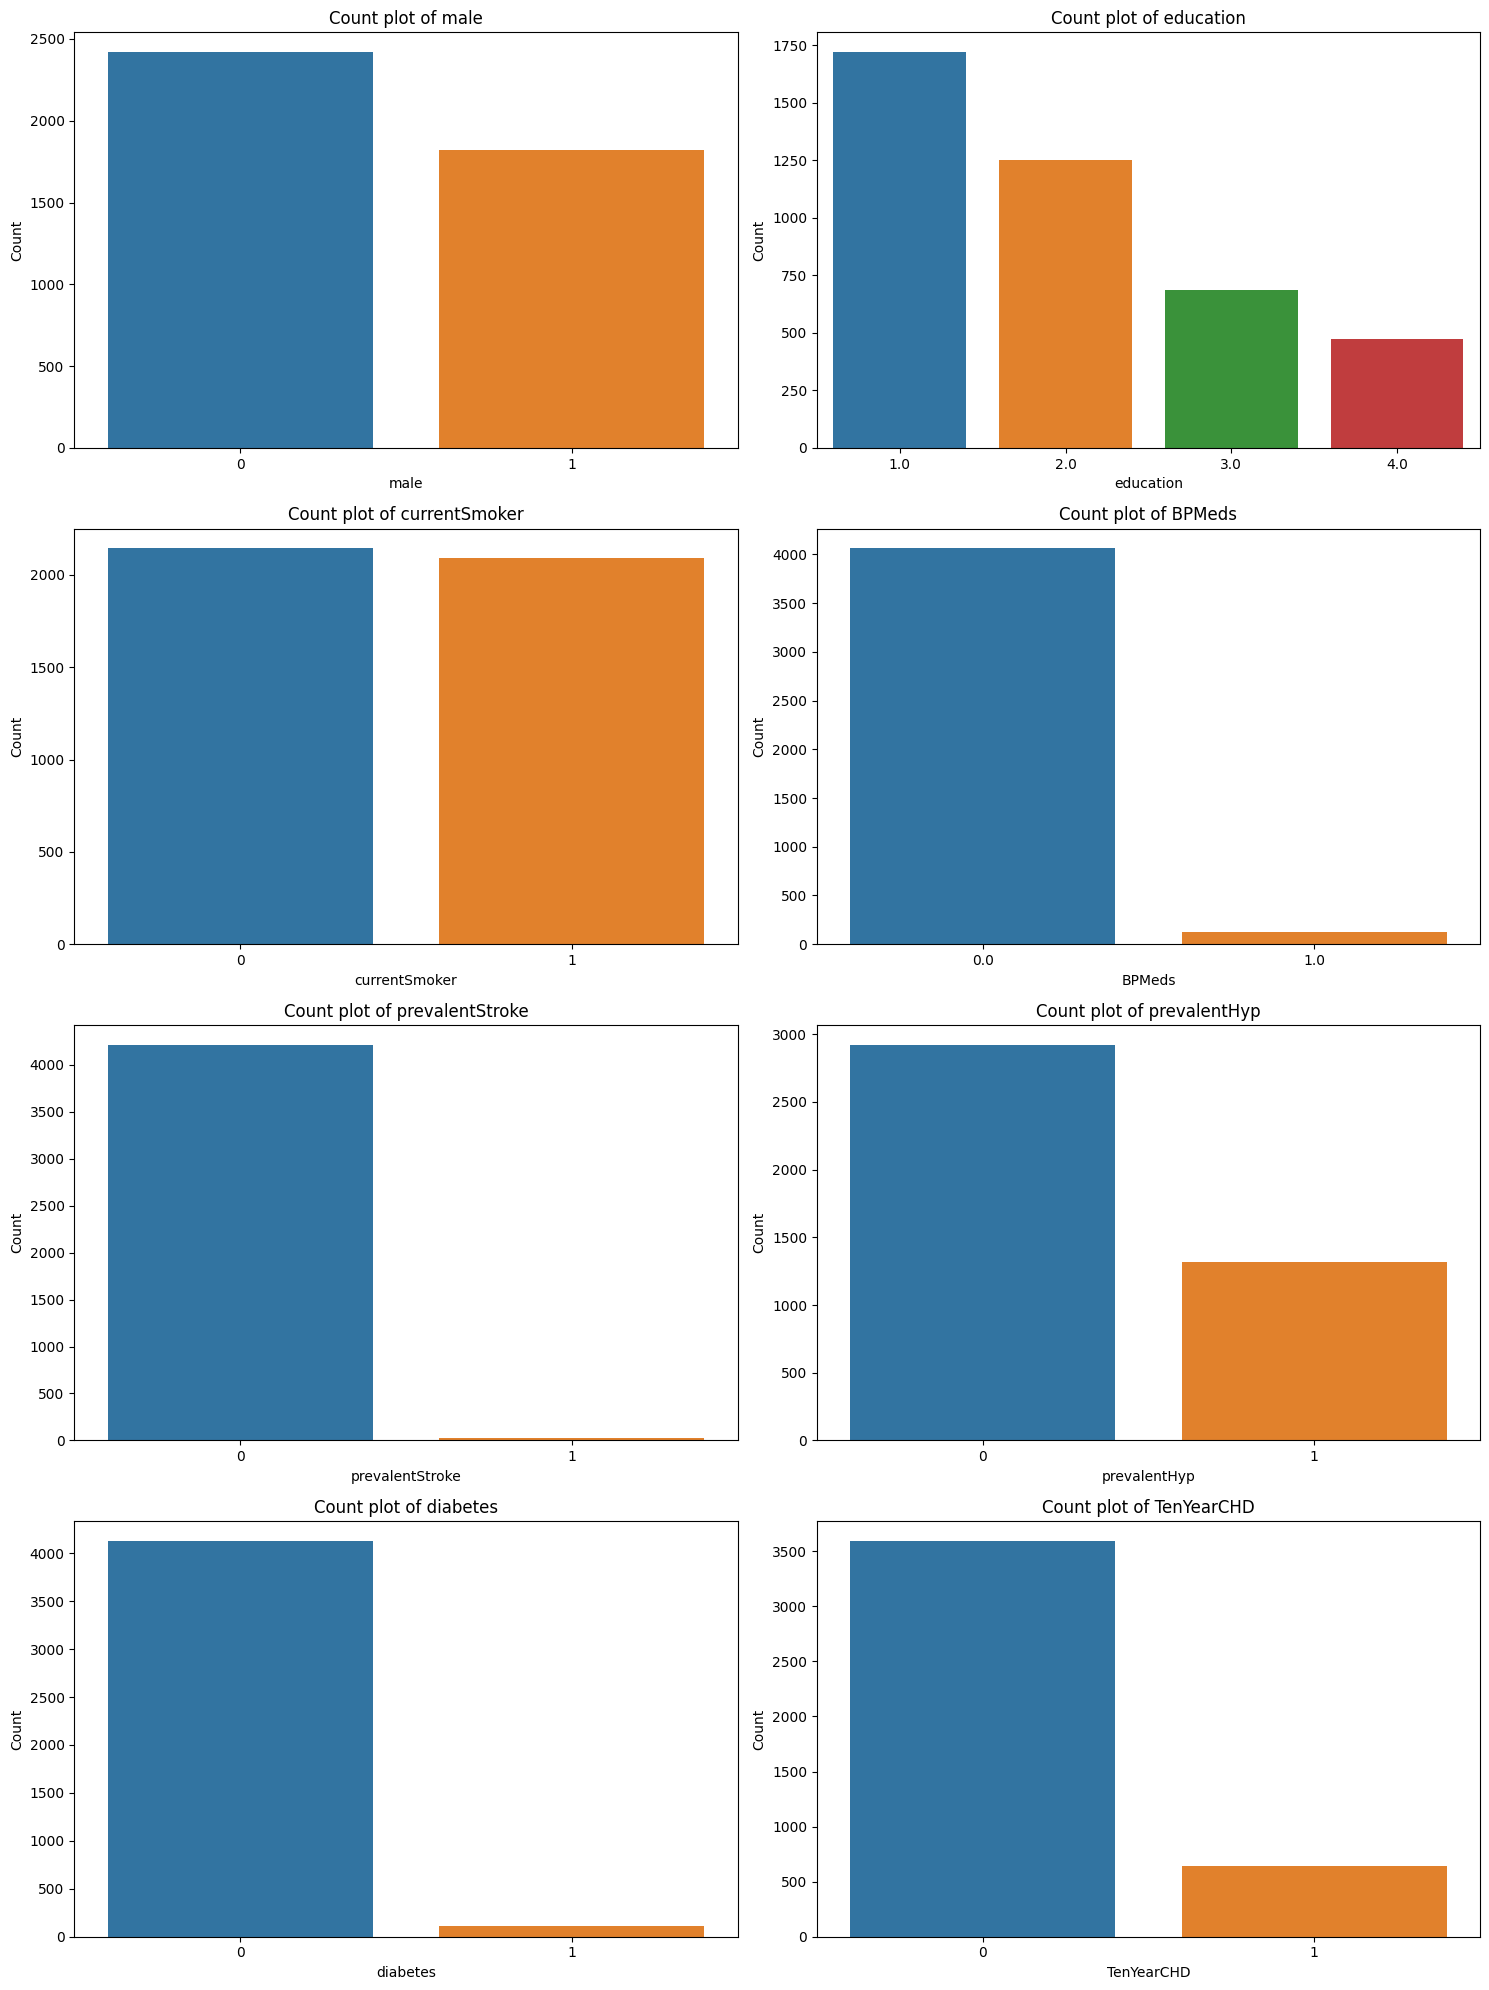

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()
for i, col in enumerate(discrete_col):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Count plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

In the bar plot, we can observe that some features have a high frequency of a single value, making them ineffective for classification purposes. These feature are:
- BPMeds
- prevalentStrokes
- diabetes

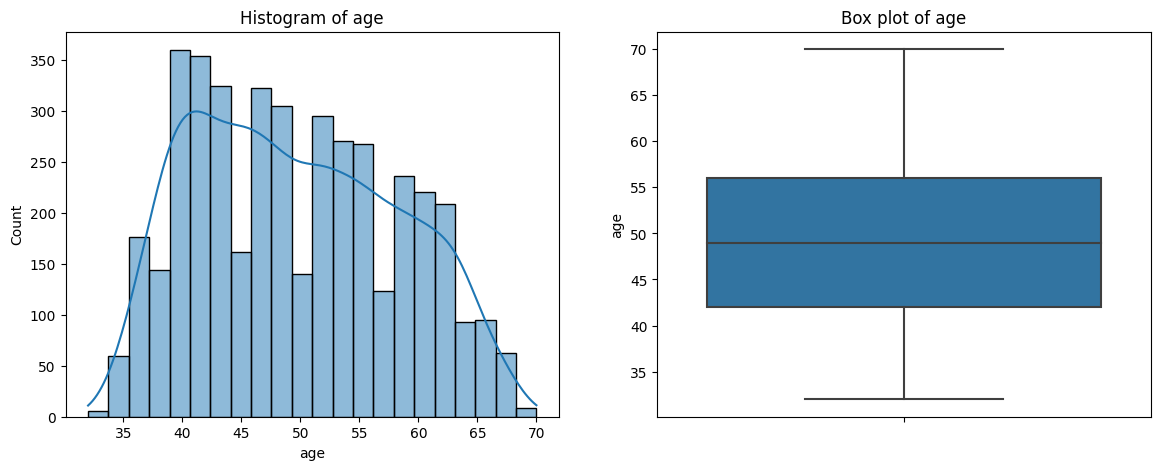

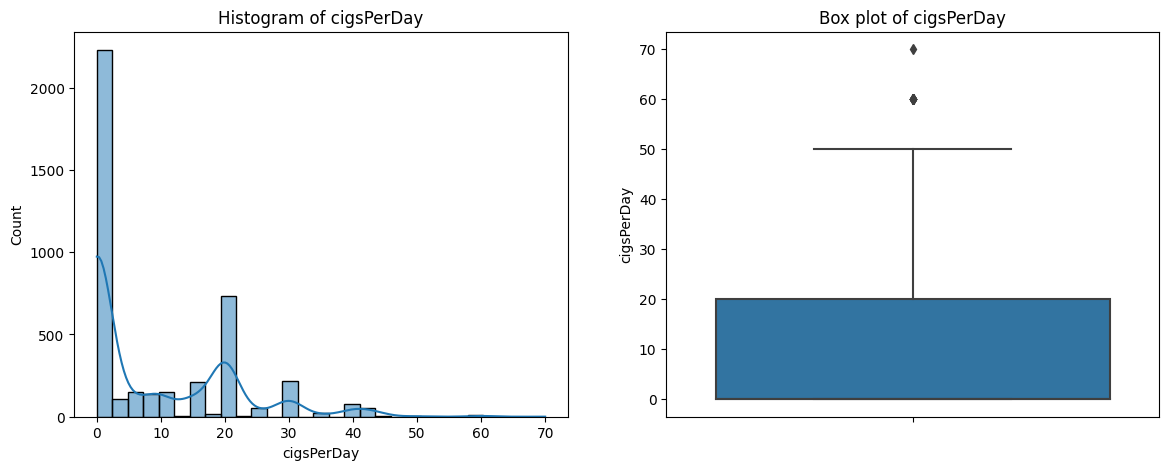

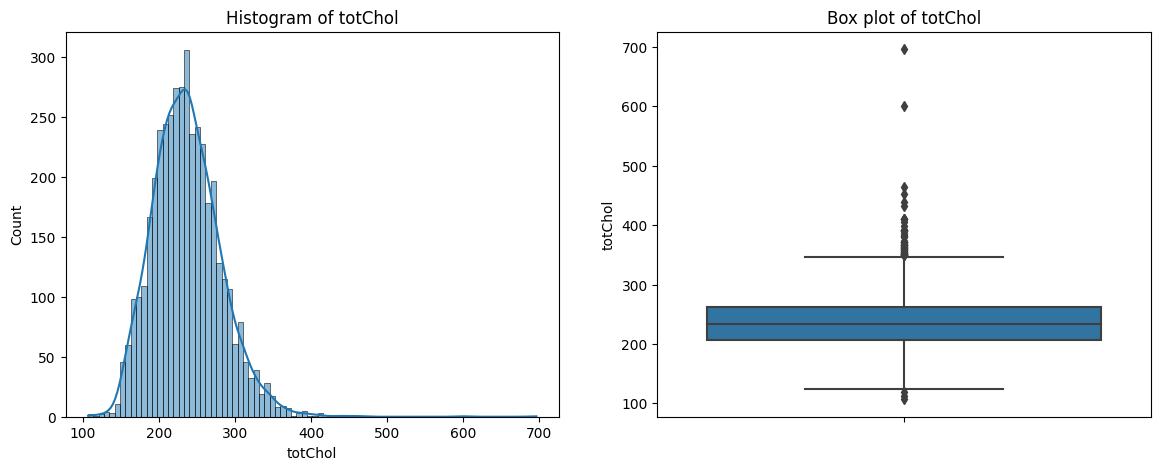

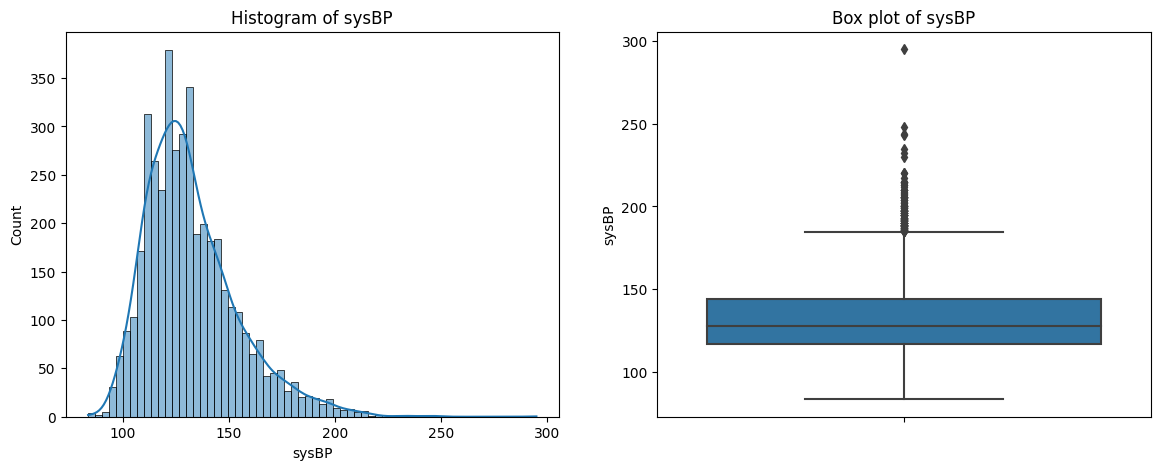

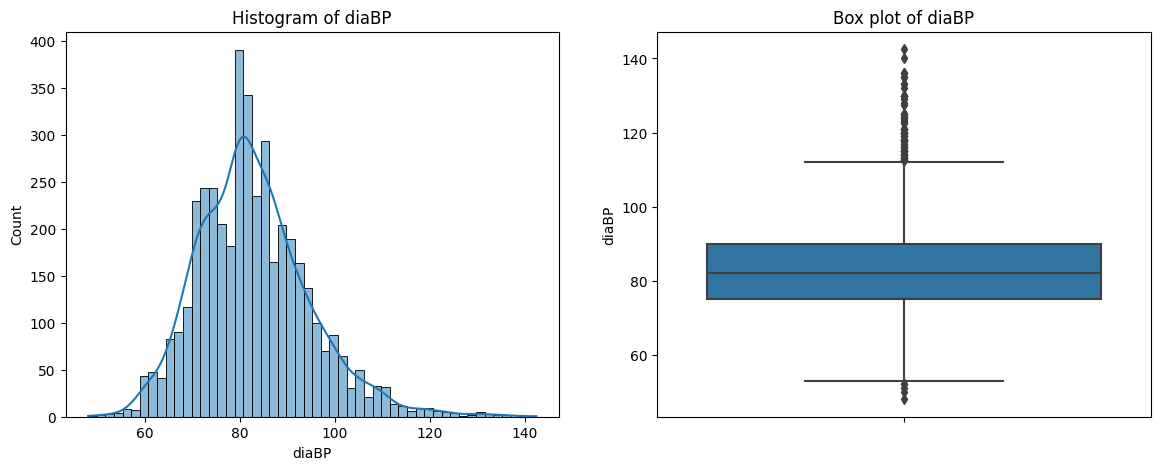

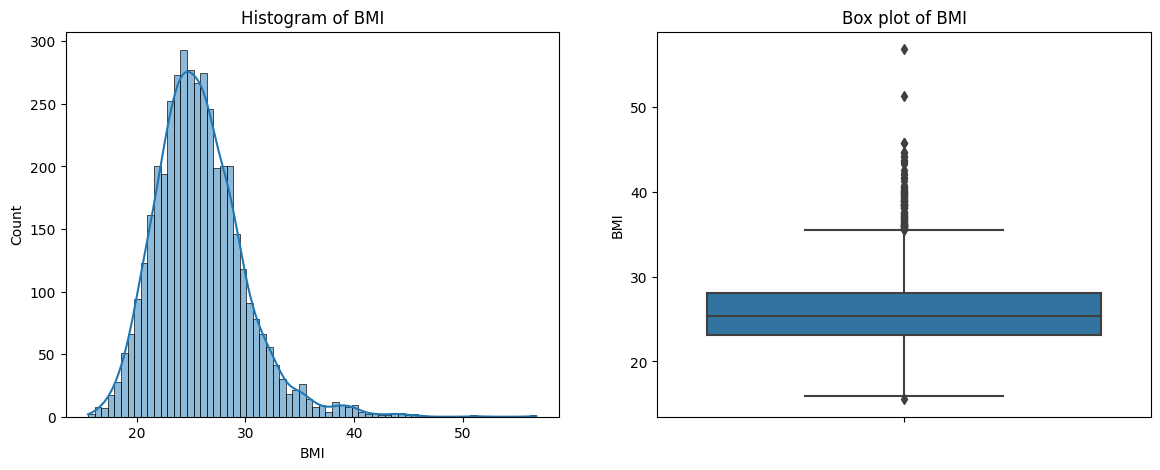

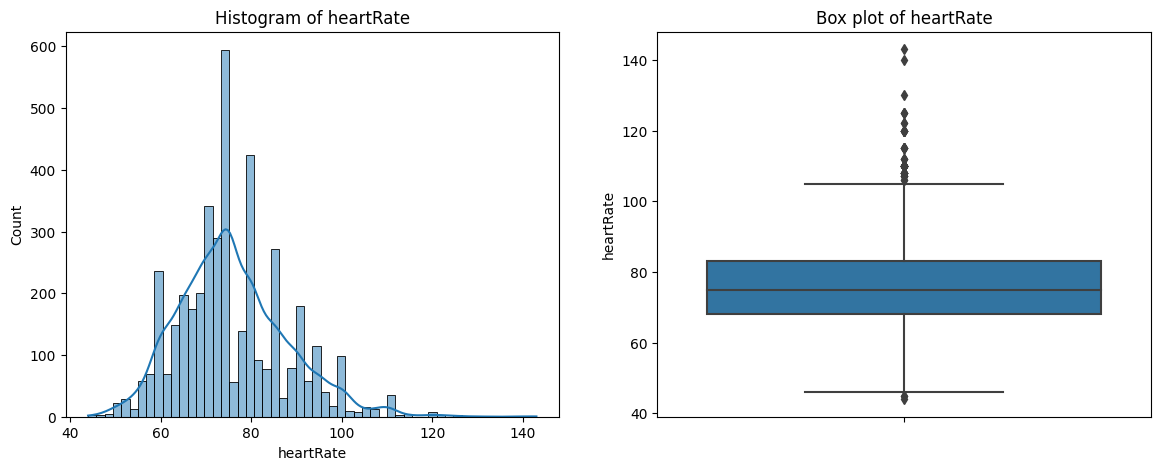

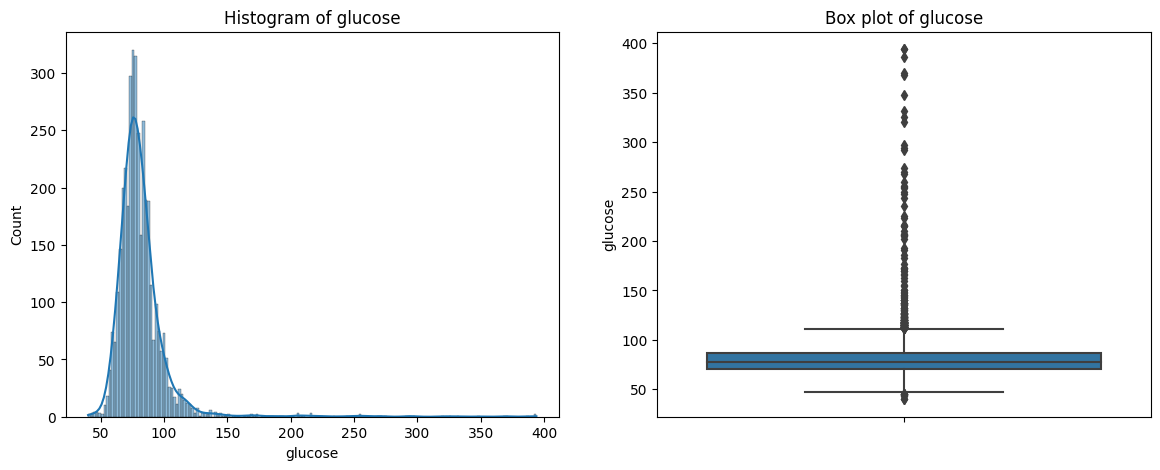

In [10]:
for col in continuous_col:      
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')
    
    # Box plot
    sns.boxplot(y=df[col], ax=axes[1])
    axes[1].set_title(f'Box plot of {col}')

From the histograms and bar plots, it is deduced that the distribution is skewed, indicating the presence of many outliers which need to be addressed.

## **Data Preparation**

### **Handling null values**

In [11]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

#### **Continuous features**
Missing values of continuous features were handled in two ways:
1. As mentioned earlier, some distributions are skewed and thus have a high absolute skewness; in such cases, it is advisable to replace the missing values with the median.
2. If the skewness of a feature is close to zero, the distribution tends to be symmetric, so it is appropriate to replace the missing values with the mean.

In [12]:
for col in continuous_col:
    sk = df[col].skew()
    if sk>0.80:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

#### **Discrete features**
Missing values of discrete variables were replaced with the mode.

In [13]:
for col in discrete_col:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [14]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### **Handling outliers**

In [15]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.954696,0.494101,8.941482,0.029259,0.005899,0.310524,0.025720,236.689476,132.352407,82.893464,25.800205,75.878924,81.603587,0.151958
std,0.495022,8.572160,1.018510,0.500024,11.902399,0.168552,0.076587,0.462763,0.158316,44.327427,22.038097,11.910850,4.071041,12.025177,22.865246,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


We decide to do this using the function *remove_outliers_from_columns*  which cleans a DataFrame from data points that significantly deviate from the majority of other values in the same column. 

The upper and lower bounds beyond which outliers are removed are determined by

- upper_bound = $Q3 + 1.5 * IQR$
- lower_bound = $Q1 - 1.5 * IQR$

where $Q1$ and $Q3$ are first and third quartiles, respectivelly, and $IQR=Q3−Q1$ is the interquartile range.

In [16]:
# Function to remove outliers
def remove_outliers_from_column(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    df_no_outliers.reset_index(drop=True, inplace=True)
    return df_no_outliers

In [17]:
for col in continuous_col:
        df=remove_outliers_from_column(df,col)

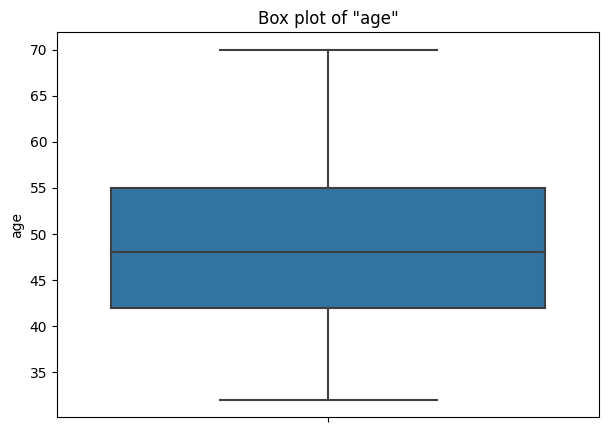

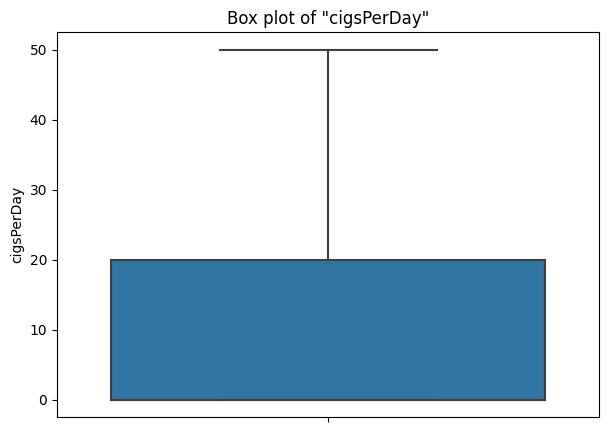

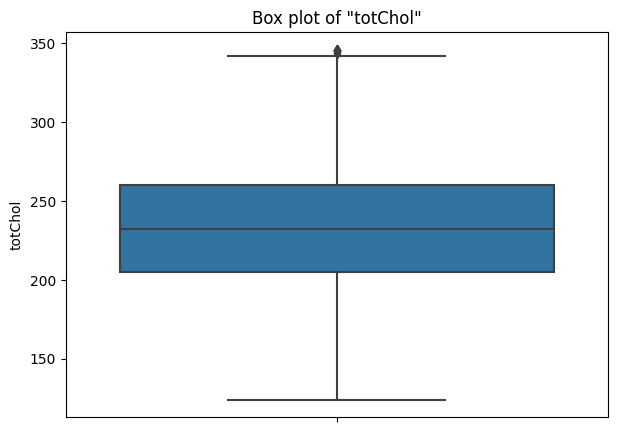

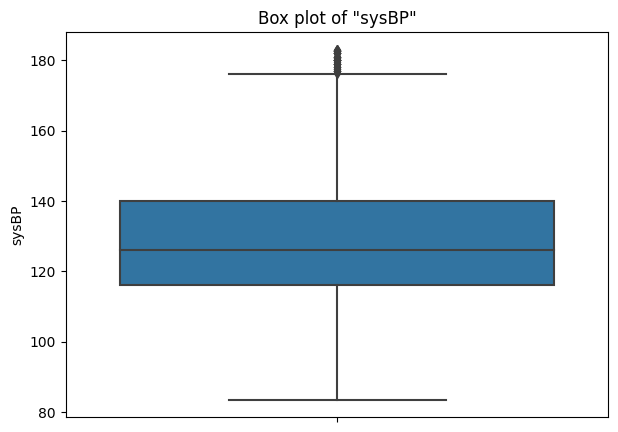

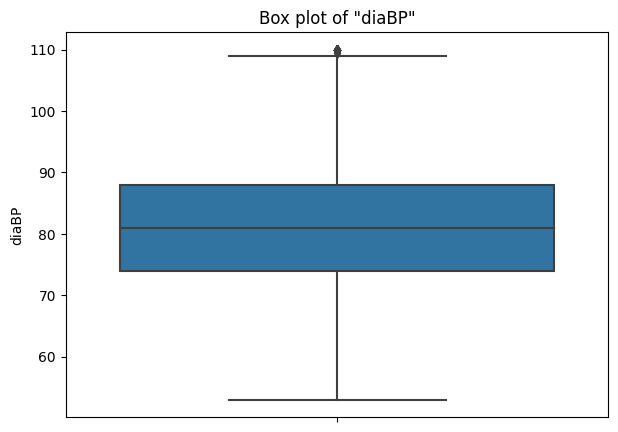

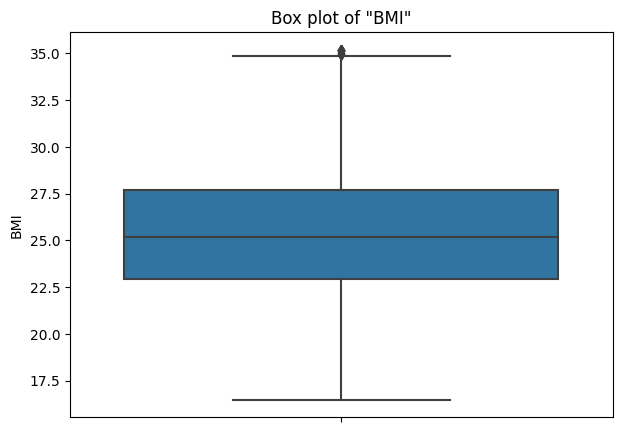

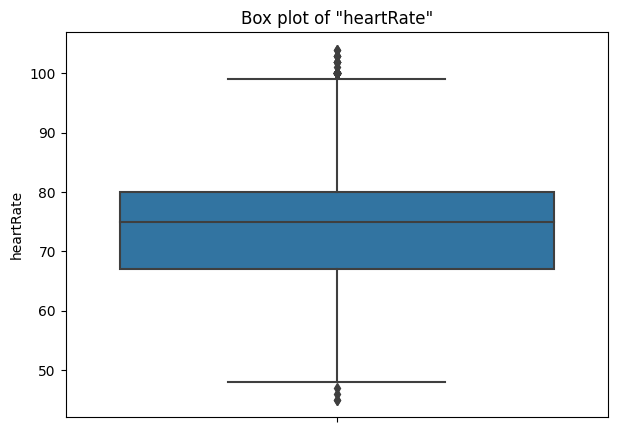

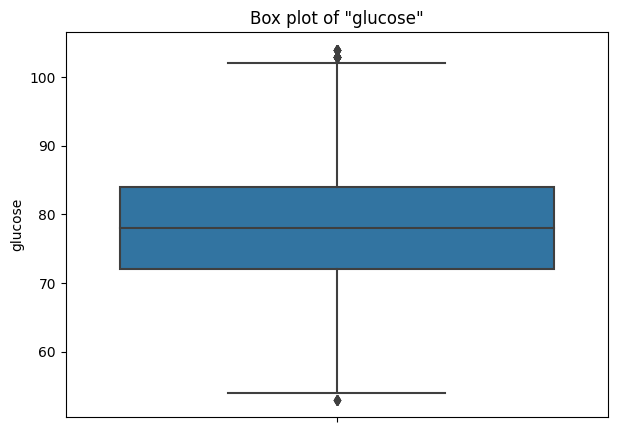

In [18]:
for col in continuous_col:
    plt.figure(figsize=(7,5))  
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of "{col}"')
    plt.show()
    

### **Feature Engineering**
Let us analyze the features to determine which can be dropped.

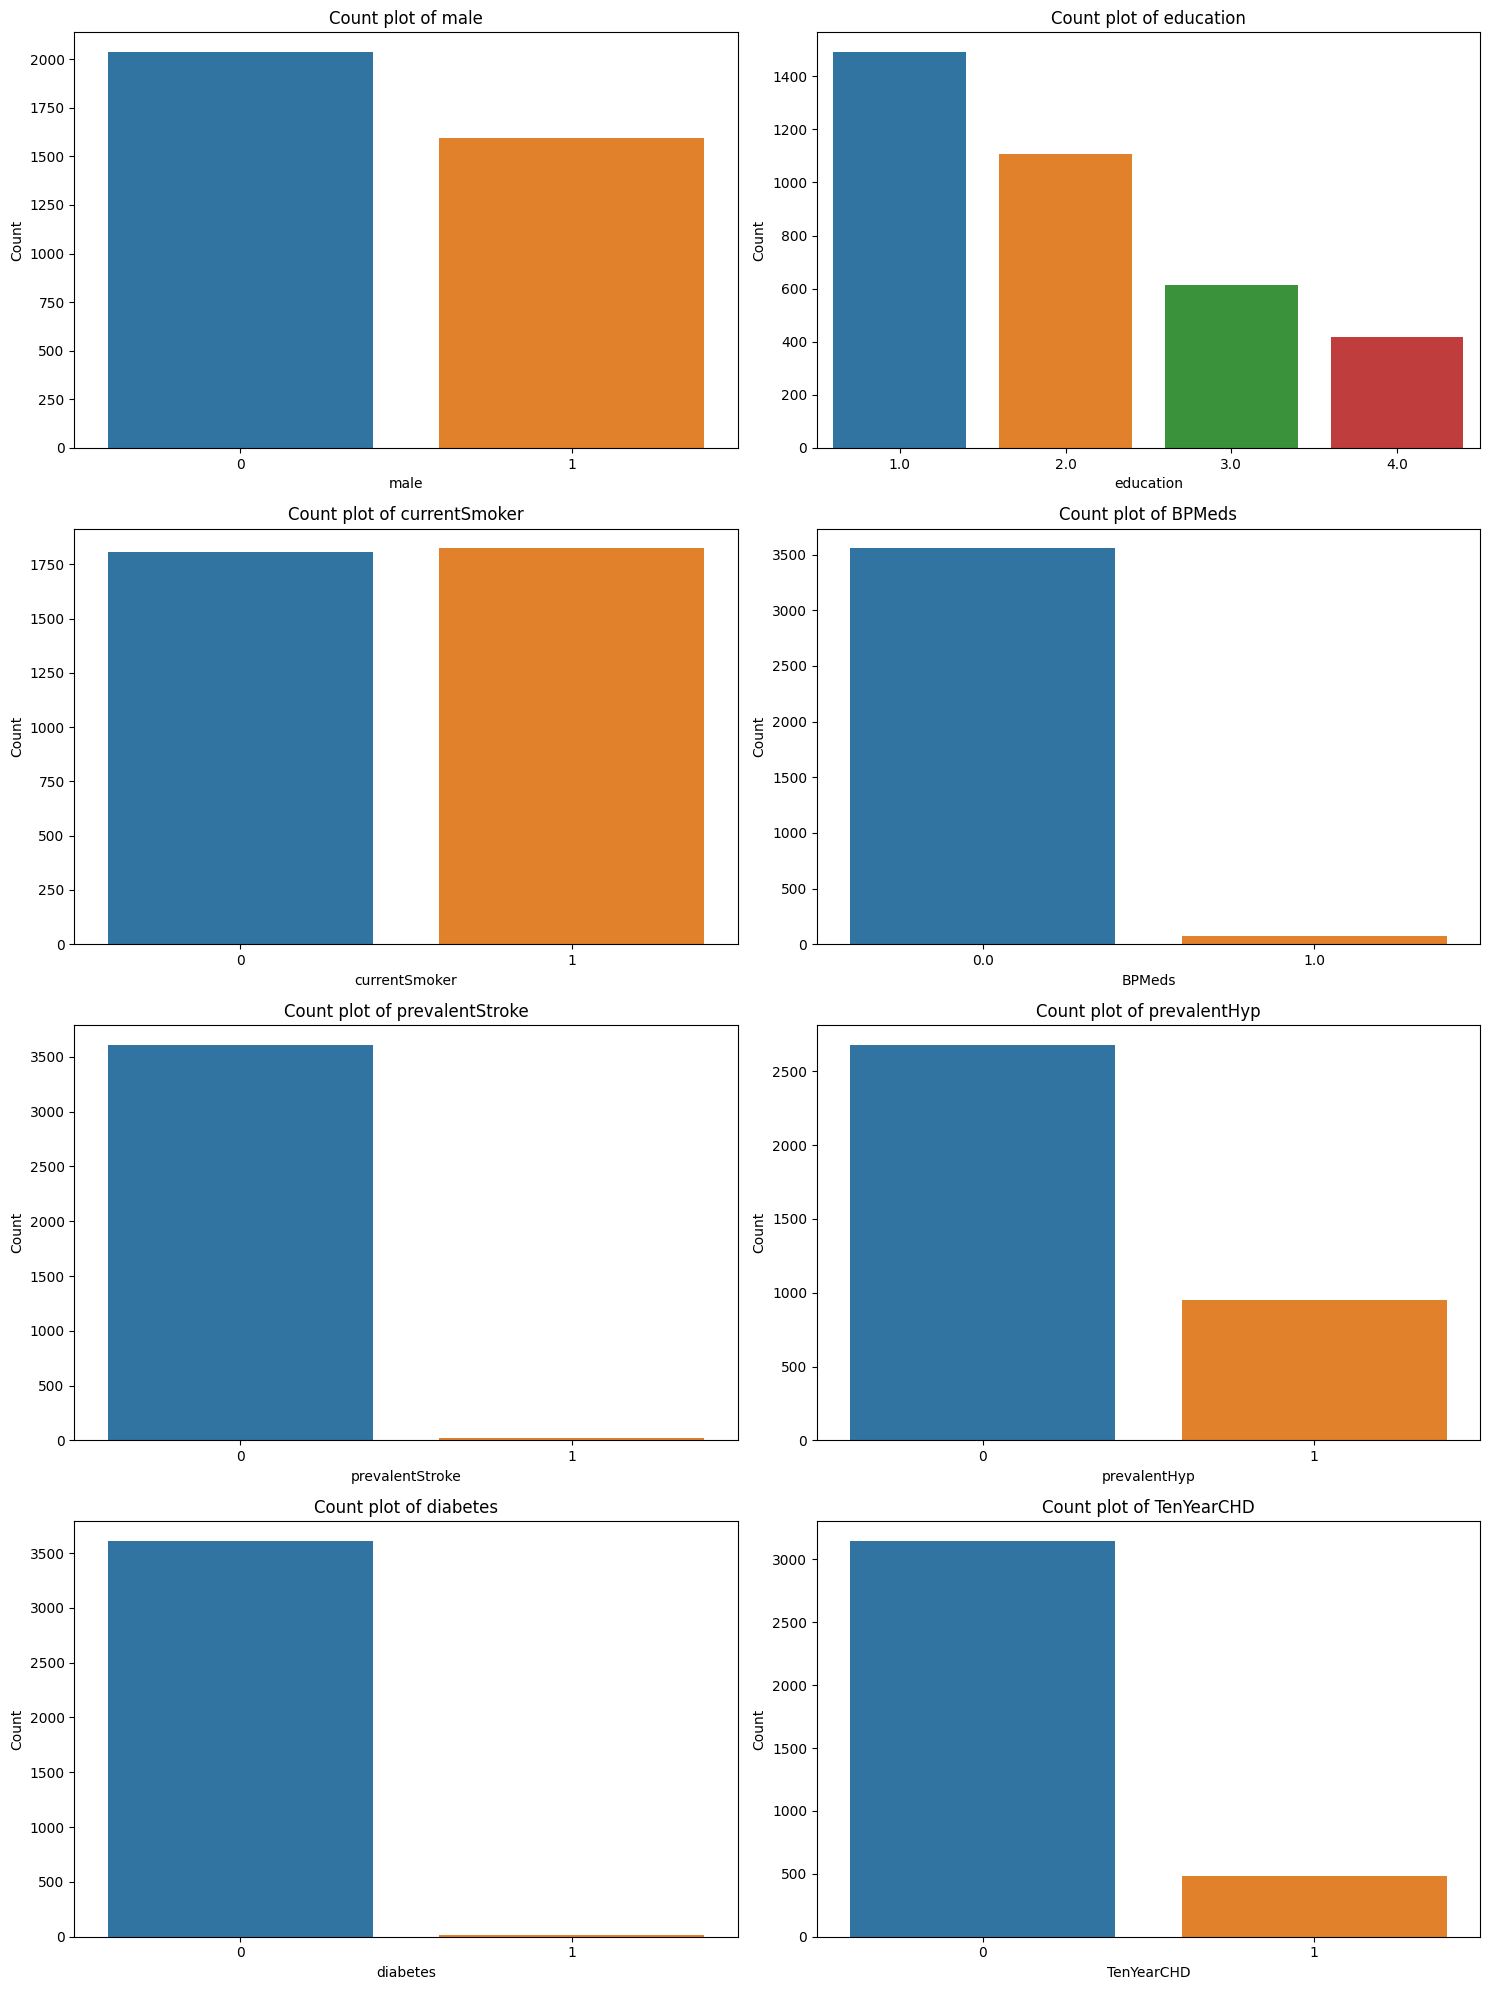

In [19]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()
for i, col in enumerate(discrete_col):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Count plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

In the bar plot, as said before, we can observe that some features have a high frequency of a single value. Since they are ineffective for classification we drop them.

In [20]:
def drop_column(df,discrete_col):
    dfd=df.copy()
    n=df.shape[0]
    for col in discrete_col:
        mode = dfd[col].mode()[0]
        freq = dfd[col].value_counts()[mode]
        perc = freq/n
        if perc >= 0.87:
            dfd.drop(col, axis=1, inplace=True)
    return dfd


In [21]:
dfd = drop_column(df,discrete_col)

### **Bivariate Analysis**

Let us analyze the relationships between the continuous features using scatter plots.

In [22]:
dfd.head()

,male,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [23]:
cont_col=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
disc_col=['education','currentSmoker', 'prevalentHyp']

cont_col_tv=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose','TenYearCHD']

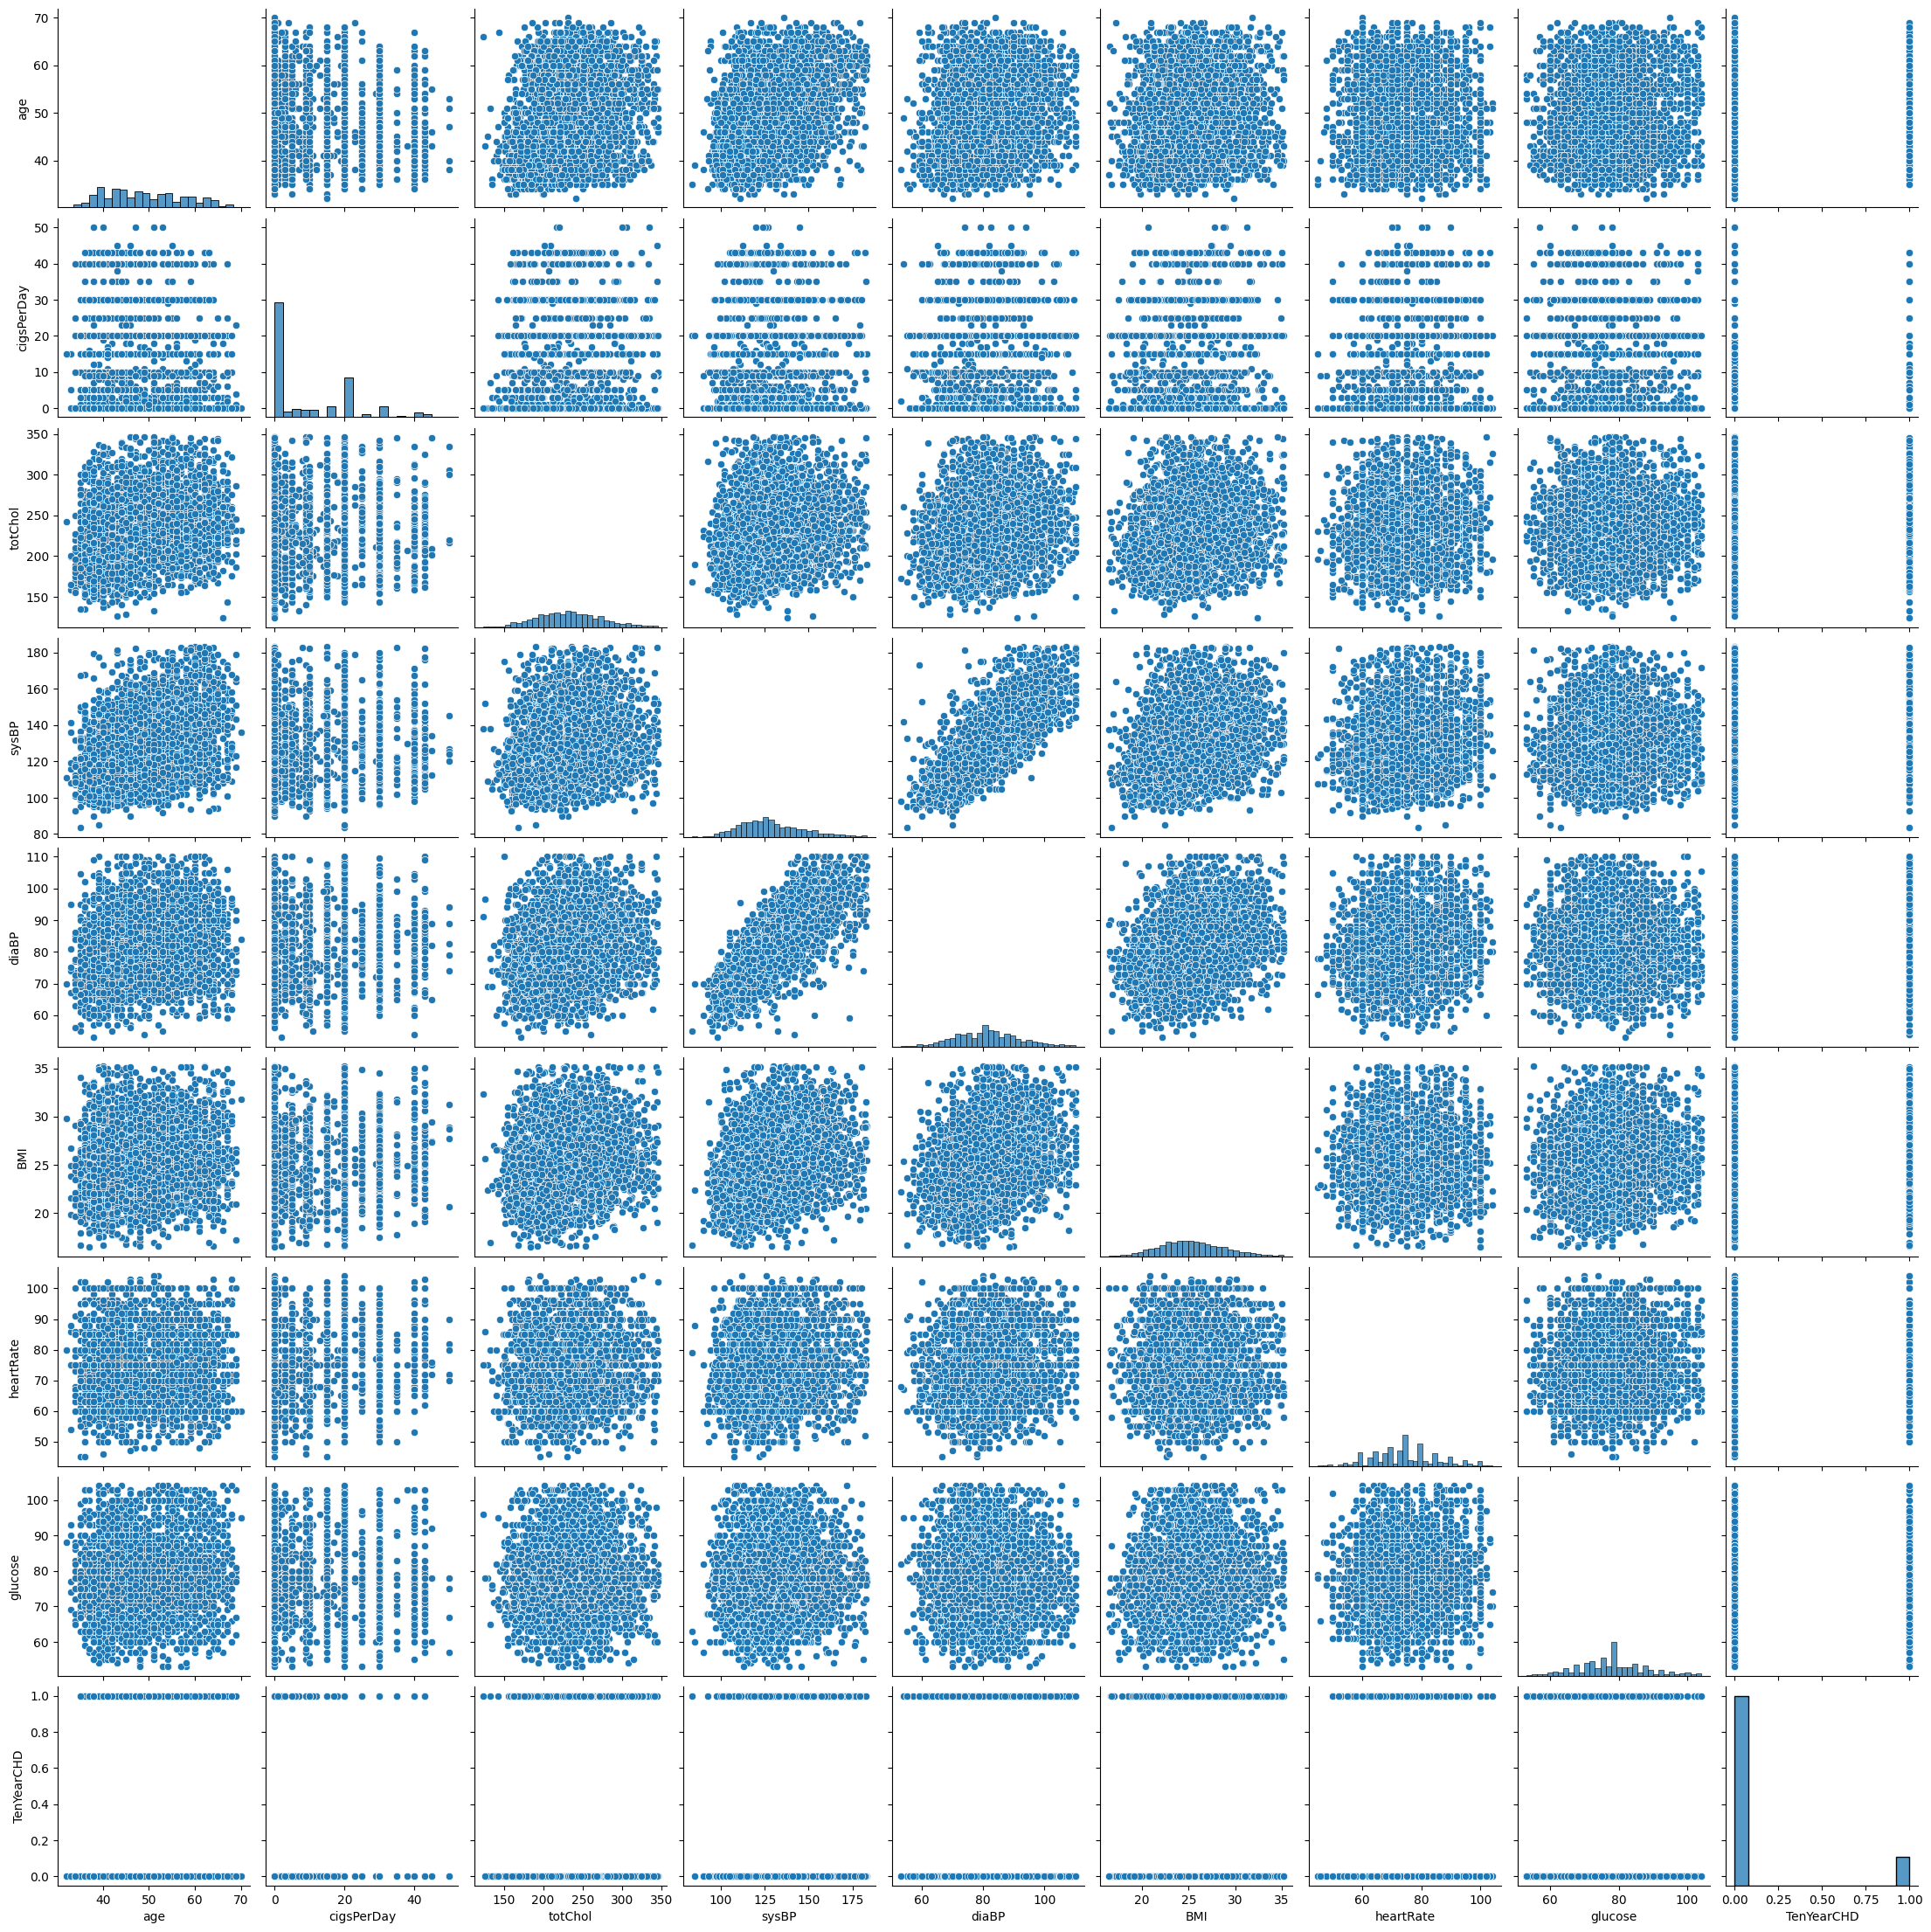

In [24]:
sns.pairplot(dfd[cont_col_tv])
plt.show()

For each discrete column, we use count plots to visualize the relative frequency with respect to each target class and understand their distribution in relation to the target variable.

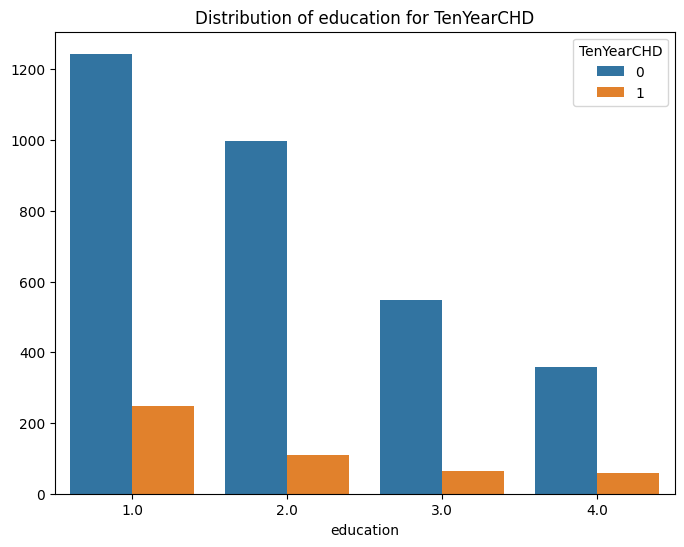

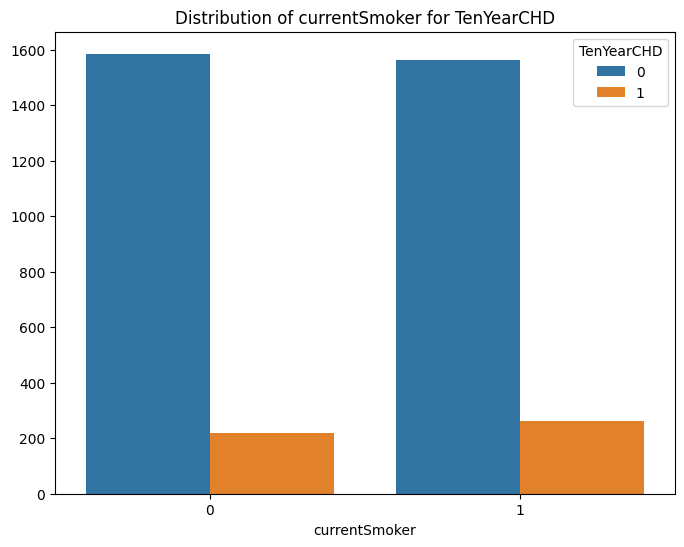

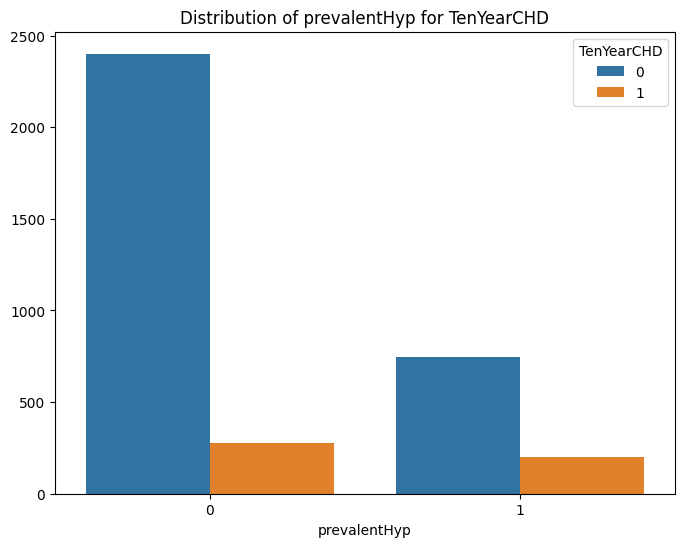

In [25]:
for col in disc_col:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='TenYearCHD', data=dfd)
    plt.title(f'Distribution of {col} for TenYearCHD')
    plt.xlabel(col)
    plt.ylabel('')
    plt.show()

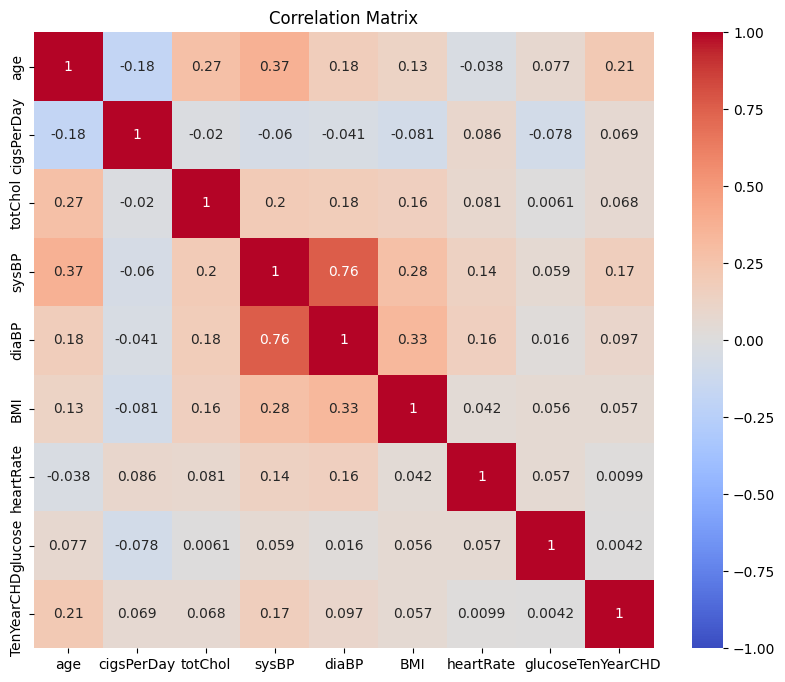

In [26]:
corr_matrix = dfd[cont_col_tv].corr()

# Plotting the Correlation Matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

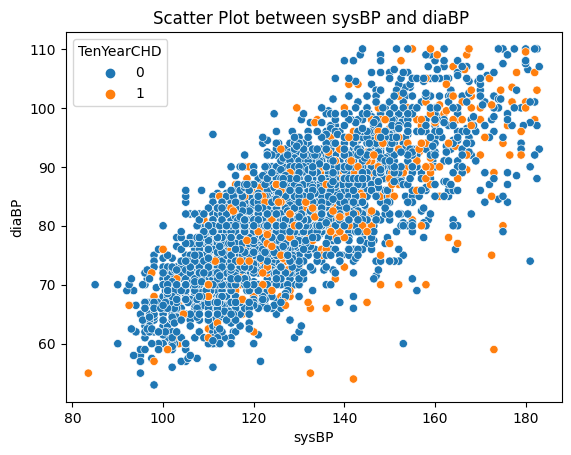

In [27]:
sns.scatterplot(x='sysBP', y='diaBP', hue='TenYearCHD', data=dfd)
plt.title('Scatter Plot between sysBP and diaBP ')
plt.xlabel('sysBP')
plt.ylabel('diaBP')
plt.show()

We can observe from the correlation matrix that the features sysBP (systolic pressure) and diaBP (diastolic pressure) are linearly positively correlated. Therefore, we can replace them with a single attribute that summarizes them. We have two options:
1. Pulse Pressure PP
$$
PP=sysBP-diaBP
$$
2. Mean Arterial Pressure MAP
$$
MAP=diaBP + \frac{sysBP-diaBP}{3}
$$

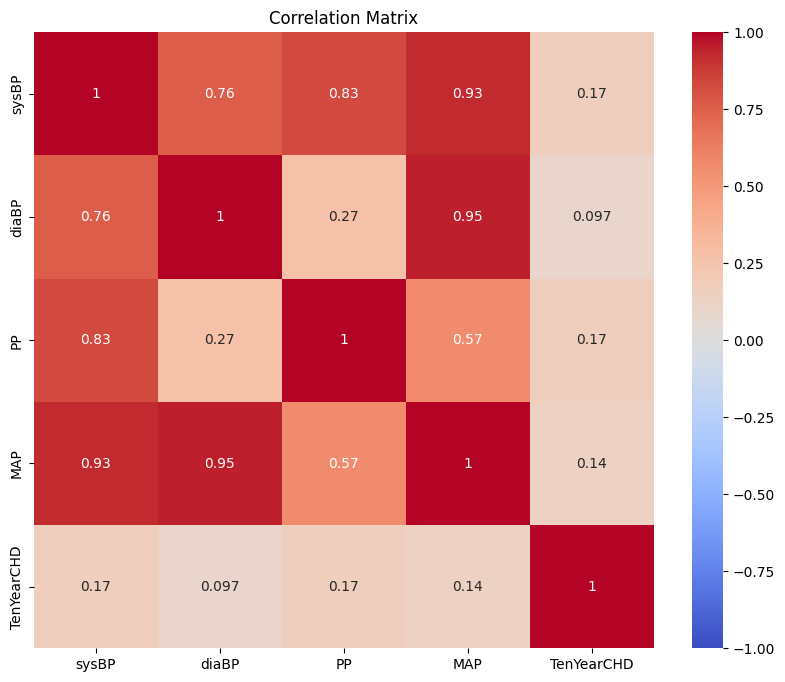

In [28]:
# Computation of Pulse Pressure (PP) and Mean Arterial Pressure (MAP)
dfd['PP'] = dfd['sysBP'] - dfd['diaBP']
dfd['MAP'] = dfd['diaBP'] + (dfd['sysBP'] - dfd['diaBP']) / 3
dfd['MAP'] = dfd['MAP'].round(2)

# Correlation Matrix
corr_matrix_1 = dfd[['sysBP', 'diaBP', 'PP', 'MAP','TenYearCHD']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_1, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Since MAP has a higher correlation with the two original features, we prefer it over PP.

In [29]:
dfd.head()

,male,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,PP,MAP
0,1,39,4.0,0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,36.0,82.00
1,0,46,2.0,0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,40.0,94.33
2,1,48,1.0,1,20.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,47.5,95.83
3,0,61,3.0,1,30.0,1,225.0,150.0,95.0,28.58,65.0,103.0,1,55.0,113.33
4,0,46,3.0,1,23.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,46.0,99.33


In [30]:
dfd.drop(['PP', 'sysBP', 'diaBP'], axis=1,inplace=True)

We drop the currentSmoker feature since it can be fully described by the cigsPerDay feature.

In [31]:
dfd.drop('currentSmoker',axis=1,inplace=True)

In [32]:
dfd.head()

,male,age,education,cigsPerDay,prevalentHyp,totChol,BMI,heartRate,glucose,TenYearCHD,MAP
0,1,39,4.0,0.0,0,195.0,26.97,80.0,77.0,0,82.00
1,0,46,2.0,0.0,0,250.0,28.73,95.0,76.0,0,94.33
2,1,48,1.0,20.0,0,245.0,25.34,75.0,70.0,0,95.83
3,0,61,3.0,30.0,1,225.0,28.58,65.0,103.0,1,113.33
4,0,46,3.0,23.0,0,285.0,23.10,85.0,85.0,0,99.33


## **Create the model**
Let us build a multiple logistic regression model with gradient descent for weight learning and test it using metrics such as accuracy, precision, recall and f1score.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Since the continuous features varied in different large scale of values we normalized them using the formula 
$$
Z=\frac{x-\bar{x}}{std}
$$
where $\bar{x}$ is the sample mean of the relative feature and $std$ the standard deviation.

In [34]:
def normalization(ds,columns):
    for col in columns:
        means = np.mean(ds[col], axis=0)
        stds = np.std(ds[col], axis=0)
        normalized_data = (ds[col] - means) / stds
        ds[col]=normalized_data
    return ds

In [35]:
def split(ds, targetvalue):
    y = ds[targetvalue]
    X = ds.drop(columns=[targetvalue])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
    return X_train, X_test, y_train, y_test

In [36]:
dfd_norm=dfd.copy()

cont_col=['age','cigsPerDay','totChol','BMI','heartRate','glucose','MAP']

dfd_norm=normalization(dfd_norm,cont_col).round(2)

In [37]:
dfd_norm.head()

,male,age,education,cigsPerDay,prevalentHyp,totChol,BMI,heartRate,glucose,TenYearCHD,MAP
0,1,-1.18,4.0,-0.77,0,-0.97,0.46,0.50,-0.09,0,-1.27
1,0,-0.36,2.0,-0.77,0,0.40,0.97,1.88,-0.19,0,-0.24
2,1,-0.12,1.0,0.94,0,0.28,-0.01,0.03,-0.81,0,-0.12
3,0,1.41,3.0,1.79,1,-0.22,0.93,-0.89,2.56,1,1.34
4,0,-0.36,3.0,1.19,0,1.27,-0.66,0.96,0.72,0,0.17


We compute the function model which is given by
$$
f_{\vec{w},b}(\vec{x})=\frac{1}{1+e^{\vec{w}\cdot\vec{x}+b}}
$$
where $z = \vec{w}\cdot\vec{x}+b$ is the model used in linear regression. 

This function is simply the probability that the target value equals $1$, that is,
$$
f_{\vec{w},b}(\vec{x})=\mathbb{P}(y=1 \mid \vec{x}; \vec{w}, b).
$$

In [38]:
def linfun(x,w,b):
    return np.dot(x,w)+b

In [39]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

The used cost function is given by 
$$
J(\vec{w},b)=c\ l_2(\vec{w},b)+\frac{1}{m}\sum_{i=1}^m L(f_{\vec{w},b}(\vec{x}^{(i)},y^{(i)}))
$$
where 
- $m$ is the number of the training examples
- $x_i$ is the $i-th$ training example and $y_i$ its target value
- $L(f_{\vec{w},b}(\vec{x}^{(i)},y^{(i)}))$ is the *loss term* of the $i^{th}$ examples which is given by
$$
L(f_{\vec{w},b}(\vec{x}^{(i)},y^{(i)})):= -y^{(i)}\log(f_{\vec{w},b}(\vec{x}^{(i)})-(1-y^{(i)})\log(1-f_{\vec{w},b}(\vec{x}^{(i)}))
$$
- $l_2$ is a regulation term to prevent the overfitting given by
$$
l_2=b^2 + \sum_{j=1}^n w_j^2
$$
 where $n$ is the number of feature.
- $c$ is a constant

In [40]:
def loss(X,y,w,b):
    z=linfun(X,w,b)
    f=sigmoid(z)
    l=-y*np.log(f)-(1-y)*np.log(1-f)
    return l

In [41]:
def cost(X,y,w,b,c):
    m=X.shape[0]
    lossvalue=loss(X,y,w,b)
    parameter = np.concatenate((w, np.array([b])))
    l2 =  np.square(np.linalg.norm(parameter, 2))
    costvalue = np.mean(lossvalue)+c/(2*m)*l2
    return costvalue

The *gradient descent* algorithm works in the following way:

1. *Start with some $w,b$*: the common choice is to set $w=0$ and $b=0$. Another possibility is to sample the parameter according to a uniform distribution in the interval $(-\varepsilon, \varepsilon)$ with $\varepsilon$ sufficiently small.

2. Compute the loss function and update simultaneously the parameters with the following formula:

$$
\begin{align*}
    
 \vec{w}_{new}=\vec{w}_{old}-\eta\frac{\partial J(\vec{w},b)}{\partial w}\\
 
 b_{new}=b_{old}-\eta\frac{\partial J(\vec{w},b)}{\partial b}
\end{align*}

 $$

 where $η$ is a learning rate(fixed small real number) and measure the step size for the minimum point researcher's. 
 
 The goal of the GD is to move for a steepest descedent direction on the loss surface to achieve the minimum with a certain tolerance. The direction of descedent is computed by the partial derivative of the loss function. In general we want to compute the gradient operator for the loss function $\nabla J=(J_{w_1},J_{w_2}, \dots, J_{w_n}, J_{b})$.

In [42]:
def logreg_gd(x,y,iter,learning_rate,a,b,c):
    n=x.shape[1]
    theta=np.random.uniform(a, b, n+1)
    w=theta[:n]
    b=theta[n]
    m=x.shape[0]
    cost_history=[]
    for i in range(iter):
        z=linfun(x,w,b)
        f=sigmoid(z)
        dw=1/m*np.dot(f-y,x)+(c/m)*w
        db=1/m*np.sum(f-y)+(c/m)*b
        w=w-learning_rate*dw
        b=b-learning_rate*db
        costval=cost(x,y,w,b,c)
        cost_history.append(costval)
    return w,b,cost_history

In [43]:
X_train, X_test, y_train, y_test = split(dfd_norm, 'TenYearCHD')
w, b, cost_history=logreg_gd(X_train,y_train,500,0.01,-0.1,0.1,0.8)

In [44]:
cost_history

[0.650411976885004,
 0.6444619230659082,
 0.6386844201371986,
 0.6330740681179798,
 0.6276256082466232,
 0.6223339233621354,
 0.6171940377859372,
 0.6122011167534721,
 0.6073504654427815,
 0.6026375276447079,
 0.598057884116818,
 0.5936072506604855,
 0.5892814759579028,
 0.5850765392031396,
 0.5809885475587394,
 0.5770137334668058,
 0.5731484518410622,
 0.5693891771640062,
 0.5657325005110307,
 0.5621751265212555,
 0.5587138703327993,
 0.5553456544983568,
 0.5520675058951774,
 0.5488765526419302,
 0.5457700210334312,
 0.5427452325028219,
 0.53979960061953,
 0.5369306281301713,
 0.5341359040485086,
 0.5314131007996157,
 0.5287599714225378,
 0.5261743468349528,
 0.5236541331626434,
 0.5211973091359624,
 0.5188019235549131,
 0.5164660928239769,
 0.5141879985573791,
 0.5119658852551003,
 0.509798058049604,
 0.5076828805229577,
 0.5056187725937704,
 0.5036042084731515,
 0.5016377146887105,
 0.49971786817545805,
 0.4978432944323383,
 0.496012665743015,
 0.4942246994594437,
 0.492478156346695

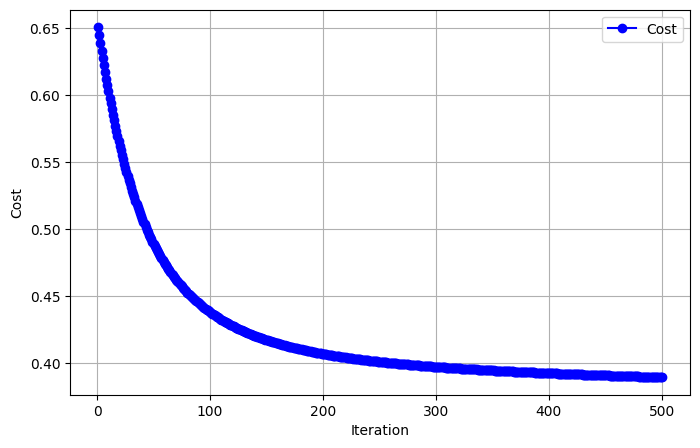

In [45]:
iterations = np.arange(1, len(cost_history) + 1) 

plt.figure(figsize=(8, 5))
plt.plot(iterations, cost_history, marker='o', linestyle='-', color='b', label='Cost')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('')
plt.grid(True)
plt.legend()
plt.show()

In [46]:
z = linfun(X_test, w, b)
sig = sigmoid(z)

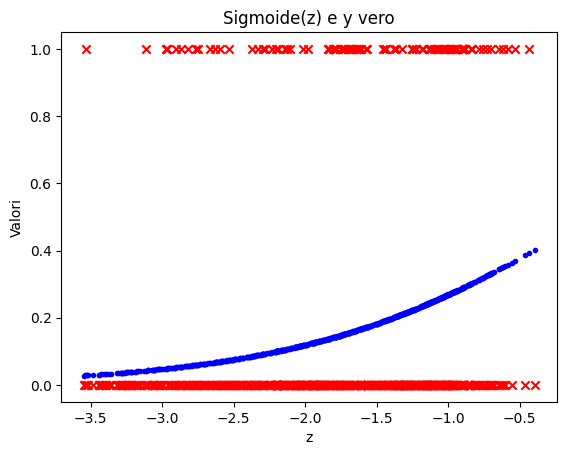

In [47]:
# Plotta sigmoide(z)
plt.plot(z, sig, 'b.', label='sigmoide(z)')

# Plotta y vero
plt.scatter(z, y_test, color='red', marker='x', label='y vero')

plt.xlabel('z')
plt.ylabel('Valori')
plt.title('Sigmoide(z) e y vero')
plt.show()

Since the sigmoid function represents the probability that the target value equals $1$, let us set a threshold. Therefore,
- if $f_{\vec{w},b}(\vec{x})\geq t$ then $\hat{y}=1$
- if $f_{\vec{w},b}(\vec{x})< t$ then $\hat{y}=0$

In [48]:
def predtest(X, w, b, t):
    sig=sigmoid(linfun(X, w, b))
    y_pred=[]
    for p in sig:
        if p>t:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred

In [74]:
y_pred=predtest(X_test, w,b,0.3)

The metrics used are:
1) **Accuracy** Accuracy measures the fraction of correctly classified instances among all instances 
$$
Acc(model)=\frac{TP+TN}{TP+TN+FP+FN}
$$
2) **Precision** Precision measures the fraction of relevant instances among the retrieved instances.
$$
Prec(model)=\frac{TP}{TP+FP}
$$
3) **Recall** Recall measures the fraction of relevant instances that have been retrieved over the total amount of relevant instances.
$$
Recall(model)=\frac{TP}{TP+FN}
$$
4) **F1-score** The F1 score is the harmonic mean of precision and recall, providing a single metric that balances both measures.
$$
F1score(model)=2\frac{Prec \cdot Recall}{Prec+Recall}
$$

where:
$$
TP = true \ positive
\\
TN = true \ negative
\\
FP = false \ positive
\\
FN = false \ negative
$$

In [75]:
def accuracy(y_pred, y_test):
    count=0
    for i in range(len(y_pred)):
        if np.array(y_test)[i]==y_pred[i]:
            count+=1
    return count/len(np.array(y_test))

In [76]:
def precision(y_pred, y_test):
    TP=0
    FP=0
    for i in range(len(y_pred)):
        y_i=np.array(y_test)[i]
        if y_i==1 and y_i==y_pred[i]:
            TP+=1
        if y_i==0 and y_i!=y_pred[i]:
            FP+=1
    return TP/(TP+FP)

In [77]:
def recall(y_pred,y_test):
    TP=0
    FN=0
    for i in range(len(y_pred)):
        y_i=np.array(y_test)[i]
        if y_i==1 and y_i==y_pred[i]:
            TP+=1
        if y_i==1 and y_i!=y_pred[i]:
            FN+=1
    return TP/(TP+FN)

In [78]:
def F1score(y_pred,y_test):
    return 2*(recall(y_pred,y_test)*precision(y_pred,y_test))/(recall(y_pred,y_test)+precision(y_pred,y_test))

In [79]:
metrics = pd.DataFrame([
    {'Accuracy': accuracy(y_pred,y_test), 'Precision':precision(y_pred,y_test), 'Reacall':recall(y_pred,y_test), 'F1score':F1score(y_pred,y_test)}])

display(metrics)

,Accuracy,Precision,Reacall,F1score
0,0.836088,0.268293,0.11,0.156028


### **Sklearn Model**

We use the LogisticRegression model provided by sklearn and evaluate it on the Training set and Testing set.

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [81]:
model = LogisticRegression(penalty='l2',class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [82]:
print(f'Model score in training data: {model.score(X_train, y_train)}')
print(f'Model score in training data: {model.score(X_test, y_test)}')

Model score in training data: 0.6422176308539945
Model score in training data: 0.6721763085399449


We plot the confusion matrix that is a table that visualizes the performance of a classification model by comparing predicted and actual classes.

In [83]:
print("\nReport:")
print(classification_report(y_test, y_pred))


Report:
              precision    recall  f1-score   support

           0       0.95      0.65      0.78       626
           1       0.27      0.78      0.40       100

    accuracy                           0.67       726
   macro avg       0.61      0.72      0.59       726
weighted avg       0.85      0.67      0.72       726



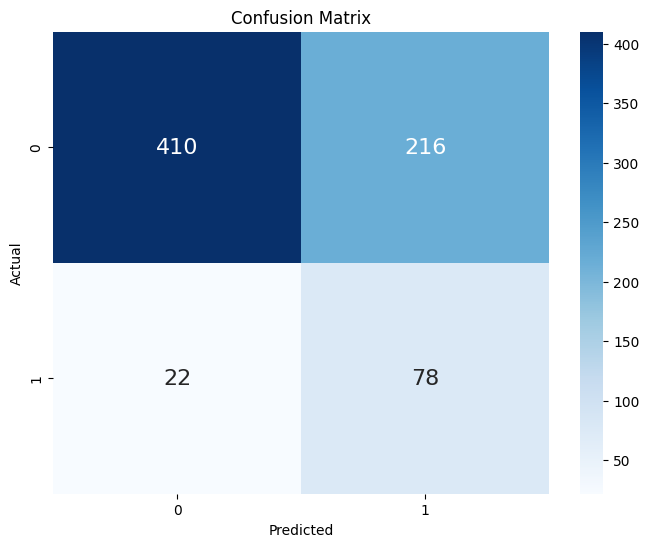

In [84]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **Conclusion** ##

Despite achieving decent accuracy, the model shows significantly low values for other metrics such as precision, recall, and F1-score. This discrepancy is primarily attributed to the imbalance in the training set, where the number of negative instances (626) vastly outweighs the positive instances (100), reflecting the overall dataset imbalance. As a result, the model performs well in classifying negative instances but struggles with positive instances. Further enhancements could include the use of sampling techniques to address this issue.